In [51]:
import pandas as pd
import tensorflow as tf
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
dict = {'class':{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}
dataset = dataset.replace(dict)

In [7]:
class0 = dataset.loc[0:49]
class1 = dataset.loc[50:99]
class1 = class1.reset_index(drop=True)
class2 = dataset.loc[100:149]
class2 = class2.reset_index(drop=True)


In [13]:
shuffle_index = np.random.permutation(50)
train_index, test_index = shuffle_index[0:40], shuffle_index[40:50]

In [14]:
class0_train, class0_test = class0.loc[train_index], class0.loc[test_index]
class1_train, class1_test = class1.loc[train_index], class1.loc[test_index]
class2_train, class2_test = class2.loc[train_index], class2.loc[test_index]

In [22]:
n = dataset.shape
X0_train, X0_test = class0_train.iloc[:, 0: n[1]-1], class0_test.iloc[:, 0 : n[1]-1]
X1_train, X1_test = class1_train.iloc[:, 0: n[1]-1], class1_test.iloc[:, 0 : n[1]-1]
X2_train, X2_test = class2_train.iloc[:, 0: n[1]-1], class2_test.iloc[:, 0 : n[1]-1]

In [33]:
y0_train, y0_test = class0_train.iloc[:,n[1]-1], class0_test.iloc[:,n[1]-1]
y1_train, y1_test = class1_train.iloc[:,n[1]-1], class1_test.iloc[:,n[1]-1]
y2_train, y2_test = class2_train.iloc[:,n[1]-1], class2_test.iloc[:,n[1]-1]


In [42]:
frame_train, frame_test = [X0_train, X1_train, X2_train], [X0_test, X1_test, X2_test]
frame_tartrain, frame_tartest = [y0_train, y1_train, y2_train], [y0_test,y1_test,y2_test]
X_train, X_test = pd.concat(frame_train), pd.concat(frame_test)
y_train, y_test = pd.concat(frame_tartrain), pd.concat(frame_tartest)
X_train, X_test = X_train.as_matrix(), X_test.as_matrix()
y_train, y_test = y_train.as_matrix(), y_test.as_matrix()


In [54]:
data = X_train
scaler = StandardScaler()
scaler.fit(data)
X_train_norm = scaler.transform(data)

data = X_test
scaler = StandardScaler()
scaler.fit(data)
X_test_norm = scaler.transform(data)


In [48]:
n_inputs = n[1] - 1
n_hidden1 = n_inputs
n_hidden2 = n_inputs
n_outputs = 3

In [105]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(z)
        else:
            return z

In [106]:
from tensorflow.contrib.layers import fully_connected

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name = "hidden1", activation=None)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=None)
    logits = neuron_layer(hidden2, n_outputs, name="outputs", activation = None)
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [107]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()


n_epochs = 2000
batch_size = 120

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(120 // batch_size):
            shuffle_index = np.random.permutation(120)
            batch_index = shuffle_index[0:batch_size]
            X_batch, y_batch = X_train_norm[batch_index], y_train[batch_index]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test_norm,y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    save_path = saver.save(sess, "./iris_model_final.ckpt")

0 Train accuracy: 0.675 Test accuracy: 0.7
1 Train accuracy: 0.675 Test accuracy: 0.7
2 Train accuracy: 0.7 Test accuracy: 0.7
3 Train accuracy: 0.68333334 Test accuracy: 0.7
4 Train accuracy: 0.69166666 Test accuracy: 0.7
5 Train accuracy: 0.675 Test accuracy: 0.7
6 Train accuracy: 0.69166666 Test accuracy: 0.73333335
7 Train accuracy: 0.71666664 Test accuracy: 0.73333335
8 Train accuracy: 0.73333335 Test accuracy: 0.73333335
9 Train accuracy: 0.75 Test accuracy: 0.73333335
10 Train accuracy: 0.76666665 Test accuracy: 0.73333335
11 Train accuracy: 0.775 Test accuracy: 0.73333335
12 Train accuracy: 0.775 Test accuracy: 0.73333335
13 Train accuracy: 0.78333336 Test accuracy: 0.76666665
14 Train accuracy: 0.78333336 Test accuracy: 0.76666665
15 Train accuracy: 0.78333336 Test accuracy: 0.76666665
16 Train accuracy: 0.78333336 Test accuracy: 0.76666665
17 Train accuracy: 0.78333336 Test accuracy: 0.76666665
18 Train accuracy: 0.78333336 Test accuracy: 0.8
19 Train accuracy: 0.78333336 Tes

165 Train accuracy: 0.85 Test accuracy: 0.93333334
166 Train accuracy: 0.85 Test accuracy: 0.93333334
167 Train accuracy: 0.85 Test accuracy: 0.93333334
168 Train accuracy: 0.85 Test accuracy: 0.93333334
169 Train accuracy: 0.85 Test accuracy: 0.93333334
170 Train accuracy: 0.85 Test accuracy: 0.93333334
171 Train accuracy: 0.85 Test accuracy: 0.93333334
172 Train accuracy: 0.85 Test accuracy: 0.93333334
173 Train accuracy: 0.85 Test accuracy: 0.93333334
174 Train accuracy: 0.85 Test accuracy: 0.93333334
175 Train accuracy: 0.85 Test accuracy: 0.93333334
176 Train accuracy: 0.85 Test accuracy: 0.93333334
177 Train accuracy: 0.85 Test accuracy: 0.93333334
178 Train accuracy: 0.85 Test accuracy: 0.93333334
179 Train accuracy: 0.85 Test accuracy: 0.93333334
180 Train accuracy: 0.85 Test accuracy: 0.93333334
181 Train accuracy: 0.84166664 Test accuracy: 0.93333334
182 Train accuracy: 0.84166664 Test accuracy: 0.93333334
183 Train accuracy: 0.84166664 Test accuracy: 0.93333334
184 Train acc

484 Train accuracy: 0.93333334 Test accuracy: 1.0
485 Train accuracy: 0.93333334 Test accuracy: 1.0
486 Train accuracy: 0.93333334 Test accuracy: 1.0
487 Train accuracy: 0.93333334 Test accuracy: 1.0
488 Train accuracy: 0.93333334 Test accuracy: 1.0
489 Train accuracy: 0.93333334 Test accuracy: 1.0
490 Train accuracy: 0.93333334 Test accuracy: 1.0
491 Train accuracy: 0.93333334 Test accuracy: 1.0
492 Train accuracy: 0.93333334 Test accuracy: 1.0
493 Train accuracy: 0.93333334 Test accuracy: 1.0
494 Train accuracy: 0.93333334 Test accuracy: 1.0
495 Train accuracy: 0.93333334 Test accuracy: 1.0
496 Train accuracy: 0.93333334 Test accuracy: 1.0
497 Train accuracy: 0.93333334 Test accuracy: 1.0
498 Train accuracy: 0.93333334 Test accuracy: 1.0
499 Train accuracy: 0.93333334 Test accuracy: 1.0
500 Train accuracy: 0.93333334 Test accuracy: 1.0
501 Train accuracy: 0.93333334 Test accuracy: 1.0
502 Train accuracy: 0.93333334 Test accuracy: 1.0
503 Train accuracy: 0.93333334 Test accuracy: 1.0


808 Train accuracy: 0.9583333 Test accuracy: 1.0
809 Train accuracy: 0.9583333 Test accuracy: 1.0
810 Train accuracy: 0.9583333 Test accuracy: 1.0
811 Train accuracy: 0.9583333 Test accuracy: 1.0
812 Train accuracy: 0.9583333 Test accuracy: 1.0
813 Train accuracy: 0.9583333 Test accuracy: 1.0
814 Train accuracy: 0.9583333 Test accuracy: 1.0
815 Train accuracy: 0.9583333 Test accuracy: 1.0
816 Train accuracy: 0.9583333 Test accuracy: 1.0
817 Train accuracy: 0.9583333 Test accuracy: 1.0
818 Train accuracy: 0.9583333 Test accuracy: 1.0
819 Train accuracy: 0.9583333 Test accuracy: 1.0
820 Train accuracy: 0.9583333 Test accuracy: 1.0
821 Train accuracy: 0.9583333 Test accuracy: 1.0
822 Train accuracy: 0.9583333 Test accuracy: 1.0
823 Train accuracy: 0.9583333 Test accuracy: 1.0
824 Train accuracy: 0.9583333 Test accuracy: 1.0
825 Train accuracy: 0.9583333 Test accuracy: 1.0
826 Train accuracy: 0.9583333 Test accuracy: 1.0
827 Train accuracy: 0.9583333 Test accuracy: 1.0
828 Train accuracy: 

1129 Train accuracy: 0.96666664 Test accuracy: 1.0
1130 Train accuracy: 0.96666664 Test accuracy: 1.0
1131 Train accuracy: 0.96666664 Test accuracy: 1.0
1132 Train accuracy: 0.96666664 Test accuracy: 1.0
1133 Train accuracy: 0.96666664 Test accuracy: 1.0
1134 Train accuracy: 0.96666664 Test accuracy: 1.0
1135 Train accuracy: 0.96666664 Test accuracy: 1.0
1136 Train accuracy: 0.96666664 Test accuracy: 1.0
1137 Train accuracy: 0.96666664 Test accuracy: 1.0
1138 Train accuracy: 0.96666664 Test accuracy: 1.0
1139 Train accuracy: 0.96666664 Test accuracy: 1.0
1140 Train accuracy: 0.96666664 Test accuracy: 1.0
1141 Train accuracy: 0.96666664 Test accuracy: 1.0
1142 Train accuracy: 0.96666664 Test accuracy: 1.0
1143 Train accuracy: 0.96666664 Test accuracy: 1.0
1144 Train accuracy: 0.96666664 Test accuracy: 1.0
1145 Train accuracy: 0.96666664 Test accuracy: 1.0
1146 Train accuracy: 0.96666664 Test accuracy: 1.0
1147 Train accuracy: 0.96666664 Test accuracy: 1.0
1148 Train accuracy: 0.96666664

1413 Train accuracy: 0.975 Test accuracy: 0.96666664
1414 Train accuracy: 0.975 Test accuracy: 0.96666664
1415 Train accuracy: 0.975 Test accuracy: 0.96666664
1416 Train accuracy: 0.975 Test accuracy: 0.96666664
1417 Train accuracy: 0.975 Test accuracy: 0.96666664
1418 Train accuracy: 0.975 Test accuracy: 0.96666664
1419 Train accuracy: 0.975 Test accuracy: 0.96666664
1420 Train accuracy: 0.975 Test accuracy: 0.96666664
1421 Train accuracy: 0.975 Test accuracy: 0.96666664
1422 Train accuracy: 0.975 Test accuracy: 0.96666664
1423 Train accuracy: 0.975 Test accuracy: 0.96666664
1424 Train accuracy: 0.975 Test accuracy: 0.96666664
1425 Train accuracy: 0.975 Test accuracy: 0.96666664
1426 Train accuracy: 0.975 Test accuracy: 0.96666664
1427 Train accuracy: 0.975 Test accuracy: 0.96666664
1428 Train accuracy: 0.975 Test accuracy: 0.96666664
1429 Train accuracy: 0.975 Test accuracy: 0.96666664
1430 Train accuracy: 0.975 Test accuracy: 0.96666664
1431 Train accuracy: 0.975 Test accuracy: 0.96

1580 Train accuracy: 0.975 Test accuracy: 0.96666664
1581 Train accuracy: 0.975 Test accuracy: 0.96666664
1582 Train accuracy: 0.975 Test accuracy: 0.96666664
1583 Train accuracy: 0.975 Test accuracy: 0.96666664
1584 Train accuracy: 0.975 Test accuracy: 0.96666664
1585 Train accuracy: 0.975 Test accuracy: 0.96666664
1586 Train accuracy: 0.975 Test accuracy: 0.96666664
1587 Train accuracy: 0.975 Test accuracy: 0.96666664
1588 Train accuracy: 0.975 Test accuracy: 0.96666664
1589 Train accuracy: 0.975 Test accuracy: 0.96666664
1590 Train accuracy: 0.975 Test accuracy: 0.96666664
1591 Train accuracy: 0.975 Test accuracy: 0.96666664
1592 Train accuracy: 0.975 Test accuracy: 0.96666664
1593 Train accuracy: 0.975 Test accuracy: 0.96666664
1594 Train accuracy: 0.975 Test accuracy: 0.96666664
1595 Train accuracy: 0.975 Test accuracy: 0.96666664
1596 Train accuracy: 0.975 Test accuracy: 0.96666664
1597 Train accuracy: 0.975 Test accuracy: 0.96666664
1598 Train accuracy: 0.975 Test accuracy: 0.96

1742 Train accuracy: 0.975 Test accuracy: 0.96666664
1743 Train accuracy: 0.975 Test accuracy: 0.96666664
1744 Train accuracy: 0.975 Test accuracy: 0.96666664
1745 Train accuracy: 0.975 Test accuracy: 0.96666664
1746 Train accuracy: 0.975 Test accuracy: 0.96666664
1747 Train accuracy: 0.975 Test accuracy: 0.96666664
1748 Train accuracy: 0.975 Test accuracy: 0.96666664
1749 Train accuracy: 0.975 Test accuracy: 0.96666664
1750 Train accuracy: 0.975 Test accuracy: 0.96666664
1751 Train accuracy: 0.975 Test accuracy: 0.96666664
1752 Train accuracy: 0.975 Test accuracy: 0.96666664
1753 Train accuracy: 0.975 Test accuracy: 0.96666664
1754 Train accuracy: 0.975 Test accuracy: 0.96666664
1755 Train accuracy: 0.975 Test accuracy: 0.96666664
1756 Train accuracy: 0.975 Test accuracy: 0.96666664
1757 Train accuracy: 0.975 Test accuracy: 0.96666664
1758 Train accuracy: 0.975 Test accuracy: 0.96666664
1759 Train accuracy: 0.975 Test accuracy: 0.96666664
1760 Train accuracy: 0.975 Test accuracy: 0.96

1905 Train accuracy: 0.975 Test accuracy: 0.96666664
1906 Train accuracy: 0.975 Test accuracy: 0.96666664
1907 Train accuracy: 0.975 Test accuracy: 0.96666664
1908 Train accuracy: 0.975 Test accuracy: 0.96666664
1909 Train accuracy: 0.975 Test accuracy: 0.96666664
1910 Train accuracy: 0.975 Test accuracy: 0.96666664
1911 Train accuracy: 0.975 Test accuracy: 0.96666664
1912 Train accuracy: 0.975 Test accuracy: 0.96666664
1913 Train accuracy: 0.975 Test accuracy: 0.96666664
1914 Train accuracy: 0.975 Test accuracy: 0.96666664
1915 Train accuracy: 0.975 Test accuracy: 0.96666664
1916 Train accuracy: 0.975 Test accuracy: 0.96666664
1917 Train accuracy: 0.975 Test accuracy: 0.96666664
1918 Train accuracy: 0.975 Test accuracy: 0.96666664
1919 Train accuracy: 0.975 Test accuracy: 0.96666664
1920 Train accuracy: 0.975 Test accuracy: 0.96666664
1921 Train accuracy: 0.975 Test accuracy: 0.96666664
1922 Train accuracy: 0.975 Test accuracy: 0.96666664
1923 Train accuracy: 0.975 Test accuracy: 0.96

In [125]:
with tf.Session() as sess:
    saver.restore(sess, "./iris_model_final.ckpt")
    X_new = [[0,0,0,0]] # some new images (scaled from 0 to 1)
    b = hidden1.eval(feed_dict={X: X_new})
    
with tf.Session() as sess:
    saver.restore(sess, "./iris_model_final.ckpt")
    X_new = np.identity(4) # some new images (scaled from 0 to 1)
    W1 = hidden1.eval(feed_dict={X: X_new}) - b
    W1 = np.transpose(W1)

INFO:tensorflow:Restoring parameters from ./iris_model_final.ckpt
INFO:tensorflow:Restoring parameters from ./iris_model_final.ckpt


In [127]:
from numpy import linalg as LA
l_ambda, v = LA.eig(W1)
l_ambda, v


(array([-2.7064192+0.j        ,  1.3242779+0.76564956j,
         1.3242779-0.76564956j,  0.3772148+0.j        ], dtype=complex64),
 array([[ 0.8314359 +0.j        ,  0.03794367+0.06391259j,
          0.03794367-0.06391259j,  0.2710468 +0.j        ],
        [ 0.31622207+0.j        ,  0.4976865 -0.43914697j,
          0.4976865 +0.43914697j,  0.9162042 +0.j        ],
        [-0.45678797+0.j        , -0.13952824+0.21753223j,
         -0.13952824-0.21753223j,  0.14333034+0.j        ],
        [ 0.00791634+0.j        ,  0.6979578 +0.j        ,
          0.6979578 -0.j        ,  0.25799206+0.j        ]],
       dtype=complex64))

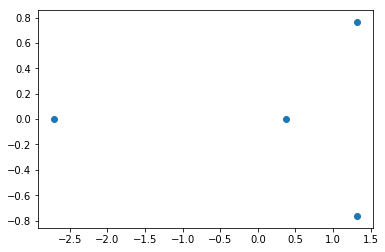

In [129]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(l_ambda.real,l_ambda.imag)

In [131]:
ab_l_ambda = np.absolute(l_ambda)
ab_v = np.absolute(v)
for i in np.arange(len(l_ambda))
    ab_l_ambda[i]*ab_v[i]

4

In [139]:
fw = (np.absolute(l_ambda[0])* np.absolute(v[0])+ np.absolute(l_ambda[1])* np.absolute(v[1])+
np.absolute(l_ambda[2])* np.absolute(v[2])+
np.absolute(l_ambda[3])* np.absolute(v[3]))

In [143]:
fwsum = fw[0] + fw[1] + fw[2] + fw[3]
fwn = fw / fwsum
fwn, fw

(array([0.35649142, 0.19456077, 0.19456077, 0.25438702], dtype=float32),
 array([3.4356608, 1.8750656, 1.8750656, 2.451637 ], dtype=float32))